# Figure - iter series

In [1]:
import os
work_dir = "H:/workspace/ptyrad_paper"
os.chdir(work_dir)
print("Current working dir: ", os.getcwd())

Current working dir:  H:\workspace\ptyrad_paper


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ptyrad.load import load_hdf5, load_pt
from ptyrad.utils.image_proc import center_crop
import h5py

In [3]:
plot_simu = True # Simu would have an extra column of ground truth

if plot_simu:
    # Simu - 20GB, kz_filter = 0.1 for PtyShv and py4DSTEM
    path_ptyrad_c_001 = '03_output/simu_tBL_WSe2/20250219_ptyrad_convergence/full_N16384_dp128_flipT001_random16_p12_1obj_6slice_dz2_Adam_plr1e-4_oalr5e-4_oplr5e-4_slr1e-4_orblur0.4_ozblur1_oathr0.98_opos_sng1.0_spr0.03_1e6/model_iter0001.pt'
    path_ptyrad_c_005 = '03_output/simu_tBL_WSe2/20250219_ptyrad_convergence/full_N16384_dp128_flipT001_random16_p12_1obj_6slice_dz2_Adam_plr1e-4_oalr5e-4_oplr5e-4_slr1e-4_orblur0.4_ozblur1_oathr0.98_opos_sng1.0_spr0.03_1e6/model_iter0005.pt'
    path_ptyrad_c_020 = '03_output/simu_tBL_WSe2/20250219_ptyrad_convergence/full_N16384_dp128_flipT001_random16_p12_1obj_6slice_dz2_Adam_plr1e-4_oalr5e-4_oplr5e-4_slr1e-4_orblur0.4_ozblur1_oathr0.98_opos_sng1.0_spr0.03_1e6/model_iter0020.pt'
    path_ptyrad_c_100 = '03_output/simu_tBL_WSe2/20250219_ptyrad_convergence/full_N16384_dp128_flipT001_random16_p12_1obj_6slice_dz2_Adam_plr1e-4_oalr5e-4_oplr5e-4_slr1e-4_orblur0.4_ozblur1_oathr0.98_opos_sng1.0_spr0.03_1e6/model_iter0100.pt'
    path_ptyrad_c_200 = '03_output/simu_tBL_WSe2/20250219_ptyrad_convergence/full_N16384_dp128_flipT001_random16_p12_1obj_6slice_dz2_Adam_plr1e-4_oalr5e-4_oplr5e-4_slr1e-4_orblur0.4_ozblur1_oathr0.98_opos_sng1.0_spr0.03_1e6/model_iter0200.pt'
    
    path_ptyrad_001 = '03_output/simu_tBL_WSe2/20250219_ptyrad_convergence/full_N16384_dp128_flipT001_random16_p12_1obj_6slice_dz2_Adam_plr1e-4_oalr5e-4_oplr5e-4_slr1e-4_orblur0.4_ozblur1_oathr0.98_sng1.0_1e6/model_iter0001.pt'
    path_ptyrad_005 = '03_output/simu_tBL_WSe2/20250219_ptyrad_convergence/full_N16384_dp128_flipT001_random16_p12_1obj_6slice_dz2_Adam_plr1e-4_oalr5e-4_oplr5e-4_slr1e-4_orblur0.4_ozblur1_oathr0.98_sng1.0_1e6/model_iter0005.pt'
    path_ptyrad_020 = '03_output/simu_tBL_WSe2/20250219_ptyrad_convergence/full_N16384_dp128_flipT001_random16_p12_1obj_6slice_dz2_Adam_plr1e-4_oalr5e-4_oplr5e-4_slr1e-4_orblur0.4_ozblur1_oathr0.98_sng1.0_1e6/model_iter0020.pt'
    path_ptyrad_100 = '03_output/simu_tBL_WSe2/20250219_ptyrad_convergence/full_N16384_dp128_flipT001_random16_p12_1obj_6slice_dz2_Adam_plr1e-4_oalr5e-4_oplr5e-4_slr1e-4_orblur0.4_ozblur1_oathr0.98_sng1.0_1e6/model_iter0100.pt'
    path_ptyrad_200 = '03_output/simu_tBL_WSe2/20250219_ptyrad_convergence/full_N16384_dp128_flipT001_random16_p12_1obj_6slice_dz2_Adam_plr1e-4_oalr5e-4_oplr5e-4_slr1e-4_orblur0.4_ozblur1_oathr0.98_sng1.0_1e6/model_iter0200.pt'

    path_ptyshv_001 = '03_output/simu_tBL_WSe2/20250219_ptyshv_convergence/6/roi6_Ndp128_step128/MLs_L1_p12_g16_pc1_noModel_mm_Ns6_dz2_reg0.1/Niter1.mat'
    path_ptyshv_005 = '03_output/simu_tBL_WSe2/20250219_ptyshv_convergence/6/roi6_Ndp128_step128/MLs_L1_p12_g16_pc1_noModel_mm_Ns6_dz2_reg0.1/Niter5.mat'
    path_ptyshv_020 = '03_output/simu_tBL_WSe2/20250219_ptyshv_convergence/6/roi6_Ndp128_step128/MLs_L1_p12_g16_pc1_noModel_mm_Ns6_dz2_reg0.1/Niter20.mat'
    path_ptyshv_100 = '03_output/simu_tBL_WSe2/20250219_ptyshv_convergence/6/roi6_Ndp128_step128/MLs_L1_p12_g16_pc1_noModel_mm_Ns6_dz2_reg0.1/Niter100.mat'
    path_ptyshv_200 = '03_output/simu_tBL_WSe2/20250219_ptyshv_convergence/6/roi6_Ndp128_step128/MLs_L1_p12_g16_pc1_noModel_mm_Ns6_dz2_reg0.1/Niter200.mat'

    path_py4dstem_001 = '03_output/simu_tBL_WSe2/20250219_py4dstem_convergence/20250219_N16384_dp128_flipT001_random16_p12_6slice_dz2_update0.5_kzf0.1_1e6/model_iter0001.hdf5'
    path_py4dstem_005 = '03_output/simu_tBL_WSe2/20250219_py4dstem_convergence/20250219_N16384_dp128_flipT001_random16_p12_6slice_dz2_update0.5_kzf0.1_1e6/model_iter0005.hdf5'
    path_py4dstem_020 = '03_output/simu_tBL_WSe2/20250219_py4dstem_convergence/20250219_N16384_dp128_flipT001_random16_p12_6slice_dz2_update0.5_kzf0.1_1e6/model_iter0020.hdf5'
    path_py4dstem_100 = '03_output/simu_tBL_WSe2/20250219_py4dstem_convergence/20250219_N16384_dp128_flipT001_random16_p12_6slice_dz2_update0.5_kzf0.1_1e6/model_iter0100.hdf5'
    path_py4dstem_200 = '03_output/simu_tBL_WSe2/20250219_py4dstem_convergence/20250219_N16384_dp128_flipT001_random16_p12_6slice_dz2_update0.5_kzf0.1_1e6/model_iter0200.hdf5'
else:
    # Exp - A100
    path_ptyrad_001 = '03_output/tBL_WSe2/20250131_ptyrad_convergence/full_N16384_dp128_flipT100_random16_p12_1obj_6slice_dz2_Adam_plr1e-4_oalr5e-4_oplr5e-4_slr5e-4_orblur0.5_ozblur1_oathr0.98_opos_sng1.0_spr0.1_aff1_0_-3_0/model_iter0001.pt'
    path_ptyrad_005 = '03_output/tBL_WSe2/20250131_ptyrad_convergence/full_N16384_dp128_flipT100_random16_p12_1obj_6slice_dz2_Adam_plr1e-4_oalr5e-4_oplr5e-4_slr5e-4_orblur0.5_ozblur1_oathr0.98_opos_sng1.0_spr0.1_aff1_0_-3_0/model_iter0005.pt'
    path_ptyrad_020 = '03_output/tBL_WSe2/20250131_ptyrad_convergence/full_N16384_dp128_flipT100_random16_p12_1obj_6slice_dz2_Adam_plr1e-4_oalr5e-4_oplr5e-4_slr5e-4_orblur0.5_ozblur1_oathr0.98_opos_sng1.0_spr0.1_aff1_0_-3_0/model_iter0020.pt'
    path_ptyrad_100 = '03_output/tBL_WSe2/20250131_ptyrad_convergence/full_N16384_dp128_flipT100_random16_p12_1obj_6slice_dz2_Adam_plr1e-4_oalr5e-4_oplr5e-4_slr5e-4_orblur0.5_ozblur1_oathr0.98_opos_sng1.0_spr0.1_aff1_0_-3_0/model_iter0100.pt'
    path_ptyrad_200 = '03_output/tBL_WSe2/20250131_ptyrad_convergence/full_N16384_dp128_flipT100_random16_p12_1obj_6slice_dz2_Adam_plr1e-4_oalr5e-4_oplr5e-4_slr5e-4_orblur0.5_ozblur1_oathr0.98_opos_sng1.0_spr0.1_aff1_0_-3_0/model_iter0200.pt'

    path_ptyshv_001 = '03_output/tBL_WSe2/20250131_ptyshv_convergence/12/roi12_Ndp128_step128/MLs_L1_p12_g16_pc0_noModel_mm_Ns6_dz2_reg1_dpFlip_ud_T/Niter1.mat'
    path_ptyshv_005 = '03_output/tBL_WSe2/20250131_ptyshv_convergence/12/roi12_Ndp128_step128/MLs_L1_p12_g16_pc0_noModel_mm_Ns6_dz2_reg1_dpFlip_ud_T/Niter5.mat'
    path_ptyshv_020 = '03_output/tBL_WSe2/20250131_ptyshv_convergence/12/roi12_Ndp128_step128/MLs_L1_p12_g16_pc0_noModel_mm_Ns6_dz2_reg1_dpFlip_ud_T/Niter20.mat'
    path_ptyshv_100 = '03_output/tBL_WSe2/20241211_ptyshv_convergence/10/roi10_Ndp128_step128/MLs_ptyrad_p12_g16_pc0_noModel_updW100_mm_Ns6_dz2_reg1_dpFlip_ud_T/Niter100.mat'
    path_ptyshv_200 = '03_output/tBL_WSe2/20241211_ptyshv_convergence/10/roi10_Ndp128_step128/MLs_ptyrad_p12_g16_pc0_noModel_updW100_mm_Ns6_dz2_reg1_dpFlip_ud_T/Niter200.mat'

    path_py4dstem_001 = '03_output/tBL_WSe2/20250131_py4DSTEM_convergence/N16384_dp128_flipT100_random16_p12_6slice_dz2_update0.5_kzf1/model_iter0001.hdf5'
    path_py4dstem_005 = '03_output/tBL_WSe2/20250131_py4DSTEM_convergence/N16384_dp128_flipT100_random16_p12_6slice_dz2_update0.5_kzf1/model_iter0005.hdf5'
    path_py4dstem_020 = '03_output/tBL_WSe2/20250131_py4DSTEM_convergence/N16384_dp128_flipT100_random16_p12_6slice_dz2_update0.5_kzf1/model_iter0020.hdf5'
    path_py4dstem_100 = '03_output/tBL_WSe2/20250124_py4DSTEM_convergence/N16384_dp128_flipT100_random16_p12_6slice_dz2_update0.5_kzf1/model_iter0100.hdf5'
    path_py4dstem_200 = '03_output/tBL_WSe2/20250124_py4DSTEM_convergence/N16384_dp128_flipT100_random16_p12_6slice_dz2_update0.5_kzf1/model_iter0200.hdf5'

In [4]:
# Load ground truth
path_ground_truth = '00_data/simu_tBL_WSe2/phonon_temporal_spatial_N16384_dp128.hdf5'

In [24]:
crop_sizes = (360,360)

if plot_simu:
    ptyrad_c_paths = [path_ptyrad_c_001, path_ptyrad_c_005, path_ptyrad_c_020, path_ptyrad_c_100, path_ptyrad_c_200]
    ptyrad_c_objects=  []
    for path in ptyrad_c_paths:
        ptyrad_c_object = center_crop(load_pt(path)['optimizable_tensors']['objp'].squeeze().cpu().numpy().sum(0), crop_sizes[0], crop_sizes[1])
        ptyrad_c_objects.append(ptyrad_c_object)
    iter_time_ptyrad_c = load_pt(path_ptyrad_c_200)['avg_iter_t']

ptyrad_paths = [path_ptyrad_001, path_ptyrad_005, path_ptyrad_020, path_ptyrad_100, path_ptyrad_200]
ptyrad_objects=  []
for path in ptyrad_paths:
    ptyrad_object = center_crop(load_pt(path)['optimizable_tensors']['objp'].squeeze().cpu().numpy().sum(0), crop_sizes[0], crop_sizes[1])
    ptyrad_objects.append(ptyrad_object)
iter_time_ptyrad = load_pt(path_ptyrad_200)['avg_iter_t']

ptyshv_paths = [path_ptyshv_001, path_ptyshv_005, path_ptyshv_020, path_ptyshv_100, path_ptyshv_200]
ptyshv_objects=  []
for path in ptyshv_paths:
    with h5py.File(path, "r") as hdf_file:
        ptyshv_object = center_crop(np.angle(np.array(hdf_file['object']).view('complex128')).sum(0).T, crop_sizes[0], crop_sizes[1])
    ptyshv_objects.append(ptyshv_object)
with h5py.File(path_ptyshv_200, "r") as hdf_file:
    iter_time_ptyshv = hdf_file['outputs']['avgTimePerIter'][()].squeeze()[()]
    
py4dstem_paths = [path_py4dstem_001, path_py4dstem_005, path_py4dstem_020, path_py4dstem_100, path_py4dstem_200]
py4dstem_objects=  []
for path in py4dstem_paths:
    py4dstem_object = center_crop(np.angle(load_hdf5(path, key='object')).sum(0), crop_sizes[0], crop_sizes[1])
    py4dstem_objects.append(py4dstem_object)   
iter_time_py4dstem = load_hdf5(path_py4dstem_200, key='iter_times').mean()

with h5py.File(path_ground_truth, "r") as hdf_file:
    ground_truth_object = center_crop(np.array(hdf_file['/gt_phase']).sum(0), crop_sizes[0], crop_sizes[1])

if plot_simu:
    ptyrad_c_objects.append(ground_truth_object)
    ptyrad_objects.append(ground_truth_object)
    py4dstem_objects.append(ground_truth_object)
    ptyshv_objects.append(ground_truth_object)

Success! Loaded .pt file path = 03_output/simu_tBL_WSe2/20250219_ptyrad_convergence/full_N16384_dp128_flipT001_random16_p12_1obj_6slice_dz2_Adam_plr1e-4_oalr5e-4_oplr5e-4_slr1e-4_orblur0.4_ozblur1_oathr0.98_opos_sng1.0_spr0.03_1e6/model_iter0001.pt
Success! Loaded .pt file path = 03_output/simu_tBL_WSe2/20250219_ptyrad_convergence/full_N16384_dp128_flipT001_random16_p12_1obj_6slice_dz2_Adam_plr1e-4_oalr5e-4_oplr5e-4_slr1e-4_orblur0.4_ozblur1_oathr0.98_opos_sng1.0_spr0.03_1e6/model_iter0005.pt
Success! Loaded .pt file path = 03_output/simu_tBL_WSe2/20250219_ptyrad_convergence/full_N16384_dp128_flipT001_random16_p12_1obj_6slice_dz2_Adam_plr1e-4_oalr5e-4_oplr5e-4_slr1e-4_orblur0.4_ozblur1_oathr0.98_opos_sng1.0_spr0.03_1e6/model_iter0020.pt
Success! Loaded .pt file path = 03_output/simu_tBL_WSe2/20250219_ptyrad_convergence/full_N16384_dp128_flipT001_random16_p12_1obj_6slice_dz2_Adam_plr1e-4_oalr5e-4_oplr5e-4_slr1e-4_orblur0.4_ozblur1_oathr0.98_opos_sng1.0_spr0.03_1e6/model_iter0100.pt
Succ

plot_simu = True


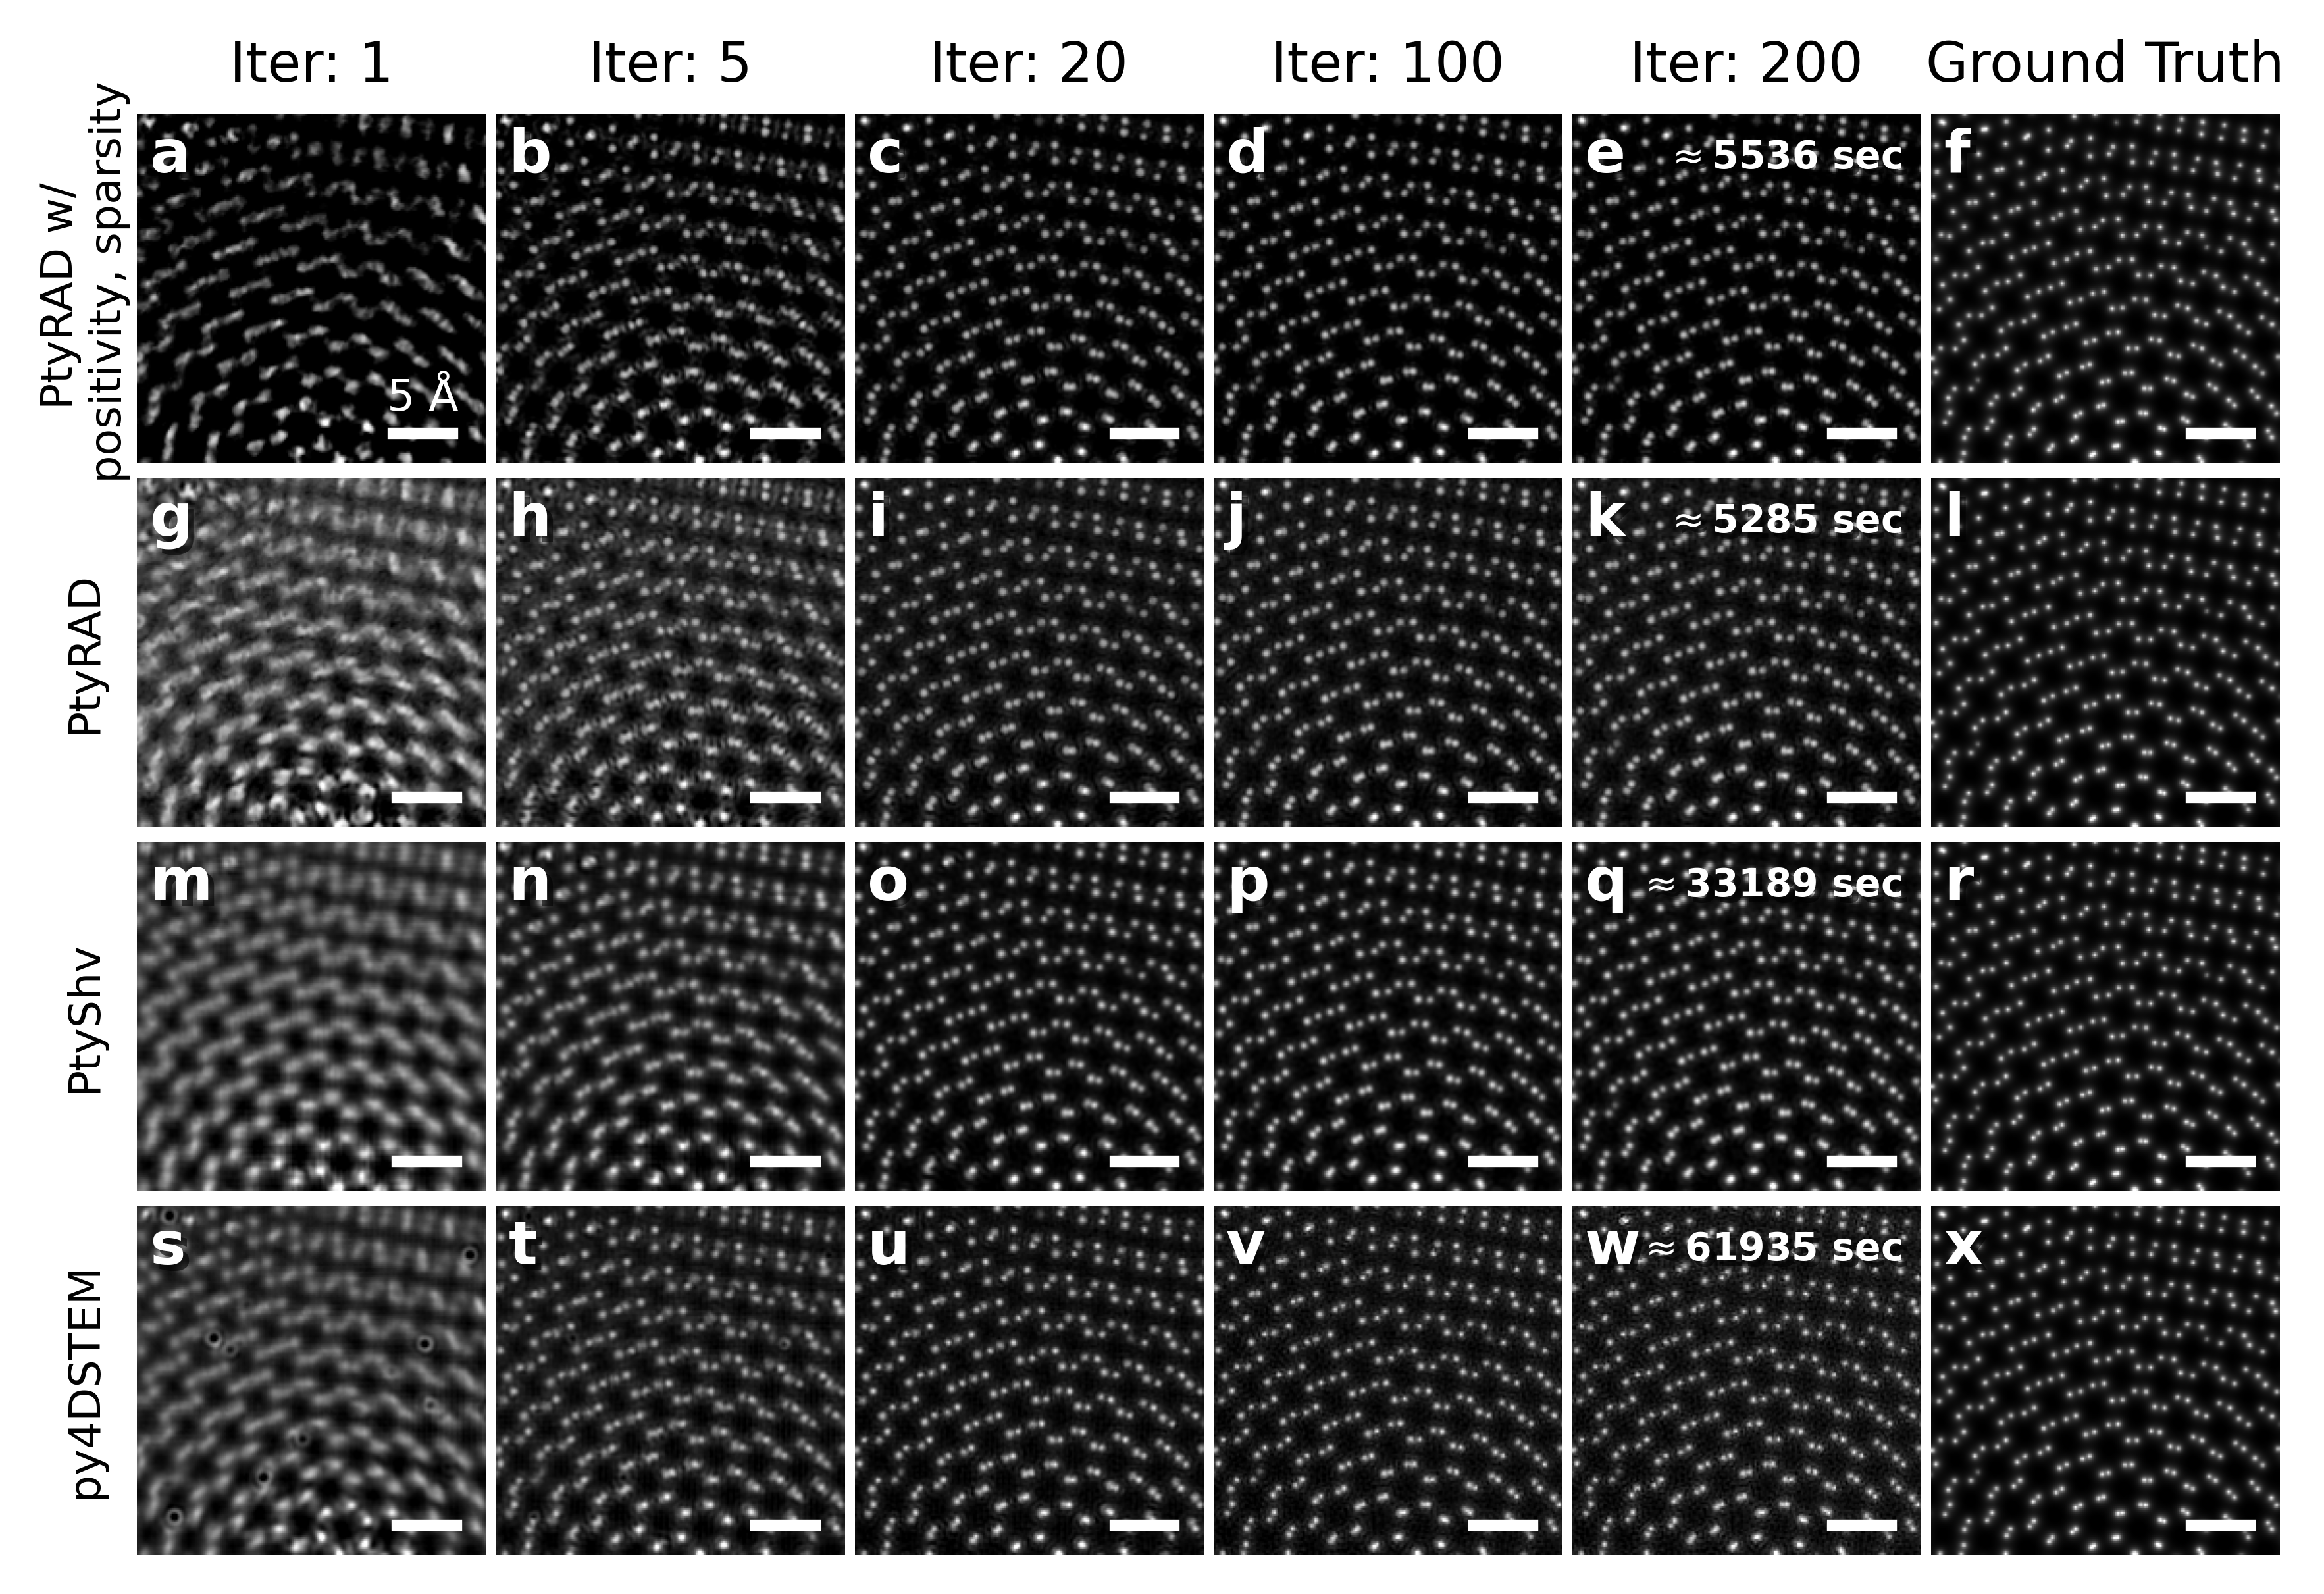

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

# Labels
row_labels = ['PtyRAD', 'PtyShv', 'py4DSTEM']
iter_labels = ['Iter: 1', 'Iter: 5', 'Iter: 20', 'Iter: 100', 'Iter: 200']

# Iteration labels
iter_value = 200
time_labels = ['$\\approx$'+f'{np.int32(iter_time_ptyrad*iter_value)} sec', 
               '$\\approx$'+f'{np.int32(iter_time_ptyshv*iter_value)} sec', 
               '$\\approx$'+f'{np.int32(iter_time_py4dstem*iter_value)} sec']

# Panel labels
panel_labels = np.array([['a', 'b', 'c', 'd', 'e'], ['f', 'g', 'h', 'i', 'j'], ['k', 'l', 'm', 'n', 'o']])
shadow_offset = (3, 3)

# Create overall stack
objs = np.stack([ptyrad_objects, ptyshv_objects, py4dstem_objects])

# Zoom-in region
# zoom_region = (270, 320, 15, 65) # (x0, x1, y0, y1)
zoom_region = (5, 185, 180, 360) # (x0, x1, y0, y1)

# Set up target-specific variables
print(f"plot_simu = {plot_simu}")
if plot_simu:
    row_labels.insert(0, 'PtyRAD w/ \n positivity, sparsity')
    time_labels.insert(0, '$\\approx$'+f'{np.int32(iter_time_ptyrad_c*iter_value)} sec')
    iter_labels.append('Ground Truth')
    objs = np.concatenate((np.array(ptyrad_c_objects)[None], objs), axis=0)
    panel_labels = np.array([['a', 'b', 'c', 'd', 'e', 'f'], ['g', 'h', 'i', 'j', 'k', 'l'], ['m', 'n', 'o', 'p', 'q', 'r'], ['s', 't', 'u', 'v', 'w', 'x']])
    figsize=(7,5)
    cols=6
    rows=4
    hspace=-0.15
    wspace=0.030
else:
    figsize=(7,4.5)
    cols=5
    rows=3
    hspace=-0.15
    wspace=0.02

# Define figure and GridSpec layout
fig = plt.figure(figsize=figsize, dpi=600)
gs = gridspec.GridSpec(rows, cols, wspace=wspace, hspace=hspace, figure=fig)

# Iterate over rows (methods) and columns (iterations)
for i, row_label in enumerate(row_labels):
    for j, iter_label in enumerate(iter_labels):
        ax = fig.add_subplot(gs[i, j])

        # Scale bar settings
        scale_bar_length = 33.47  # Length in pixels
        scale_bar_label = "5 $\\mathrm{\\AA}$"  
        scale_bar_color = "white"
        fontprops = fm.FontProperties(size=8)

        # Main image
        obj = objs[i,j][zoom_region[2]:zoom_region[3], zoom_region[0]:zoom_region[1]]
        vmin, vmax = np.percentile(obj, [1, 99.95])
        ax.imshow(obj, cmap='gray', origin='upper', vmin=vmin, vmax=vmax)
        ax.axis('off')

        # iteration label for the top row
        if i == 0:
            ax.set_title(iter_label, fontsize=10)

        # Add label with text shadow
        ax.text(6 + shadow_offset[0], 6 + shadow_offset[1], panel_labels[i, j], color='black', fontsize=11, fontweight='bold', va='top', ha='left', alpha=0.6)
        ax.text(6, 6, panel_labels[i, j], color='white', fontsize=11, fontweight='bold', va='top', ha='left')
        
        # Iteration label
        if j == 4:
            ax.text(170 + shadow_offset[0], 12 + shadow_offset[1], time_labels[i], color='black', fontsize=7, fontweight='bold', va='top', ha='right', alpha=0.6)
            ax.text(170, 12, time_labels[i], color='white', fontsize=7, fontweight='bold', ha='right', va='top')

        # Add scale bar
        if i == 0 and j == 0:
            scalebar = AnchoredSizeBar(ax.transData, scale_bar_length, scale_bar_label,
                                loc='lower right', pad=0.5, color=scale_bar_color, frameon=False, size_vertical=3, label_top=True,
                                fontproperties=fontprops)
        else:
            scalebar = AnchoredSizeBar(ax.transData, scale_bar_length, '',
                                    loc='lower right', pad=0.5, color=scale_bar_color, frameon=False, size_vertical=3, label_top=True,
                                    fontproperties=fontprops)
        ax.add_artist(scalebar)

        # Add row labels on the leftmost column
        if j == 0:
            ax.annotate(row_label, xy=(-0.15, 0.5), xycoords='axes fraction', fontsize=8, ha='center', va='center', rotation=90)


if plot_simu:
    fig_name = 'Fig_S04_iter_series_simu_20GB'
else:
    fig_name = 'Fig_S08_iter_series_exp_a100'

plt.savefig(f"05_figures/{fig_name}.pdf", bbox_inches="tight")
plt.savefig(f"05_figures/{fig_name}.png", bbox_inches="tight")
# Show the plot
plt.show()
